<a href="https://colab.research.google.com/github/meyfemi/Twitter-sentiment-analysis/blob/main/Copy_of_twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import warnings
#warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_training = pd.read_csv("drive/My Drive/Colab Notebooks/Dissertation/twitter_training.csv",names=['Tweet_ID','entity','sentiment','content'],header=None)
df_validation = pd.read_csv("drive/My Drive/Colab Notebooks/Dissertation/twitter_validation.csv",names=['Tweet_ID','entity','sentiment','content'],header=None)

**Data Exploration**

In [ ]:
df_training.head()

,Tweet_ID,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_training.sample(5)

,Tweet_ID,entity,sentiment,content
25880,842,AssassinsCreed,Positive,Assassin's Creed Valhalla will appear a week e...
13711,8752,NBA2K,Neutral,Yo this is beyond me @ Ronnie2K @ CallMeAgent0...
9133,9569,Overwatch,Neutral,normal people: f to pay respect. astronomers: ...
23740,4468,Google,Negative,"Yes, @google, I please confirm your with this ..."
17172,9744,PlayStation5(PS5),Irrelevant,I have the worst luck for basically since my f...


In [ ]:
df_training.entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
df_training.entity.nunique()

32

In [ ]:
df_training.shape

(74682, 4)

In [ ]:
df_training.describe()

,Tweet_ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
df_training.sentiment.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

sentiments for all the entities

In [ ]:
table = pd.crosstab(df_training['entity'], df_training['sentiment'])
# table.index = range(1, len(table)+1)
table

sentiment,Irrelevant,Negative,Neutral,Positive
entity,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


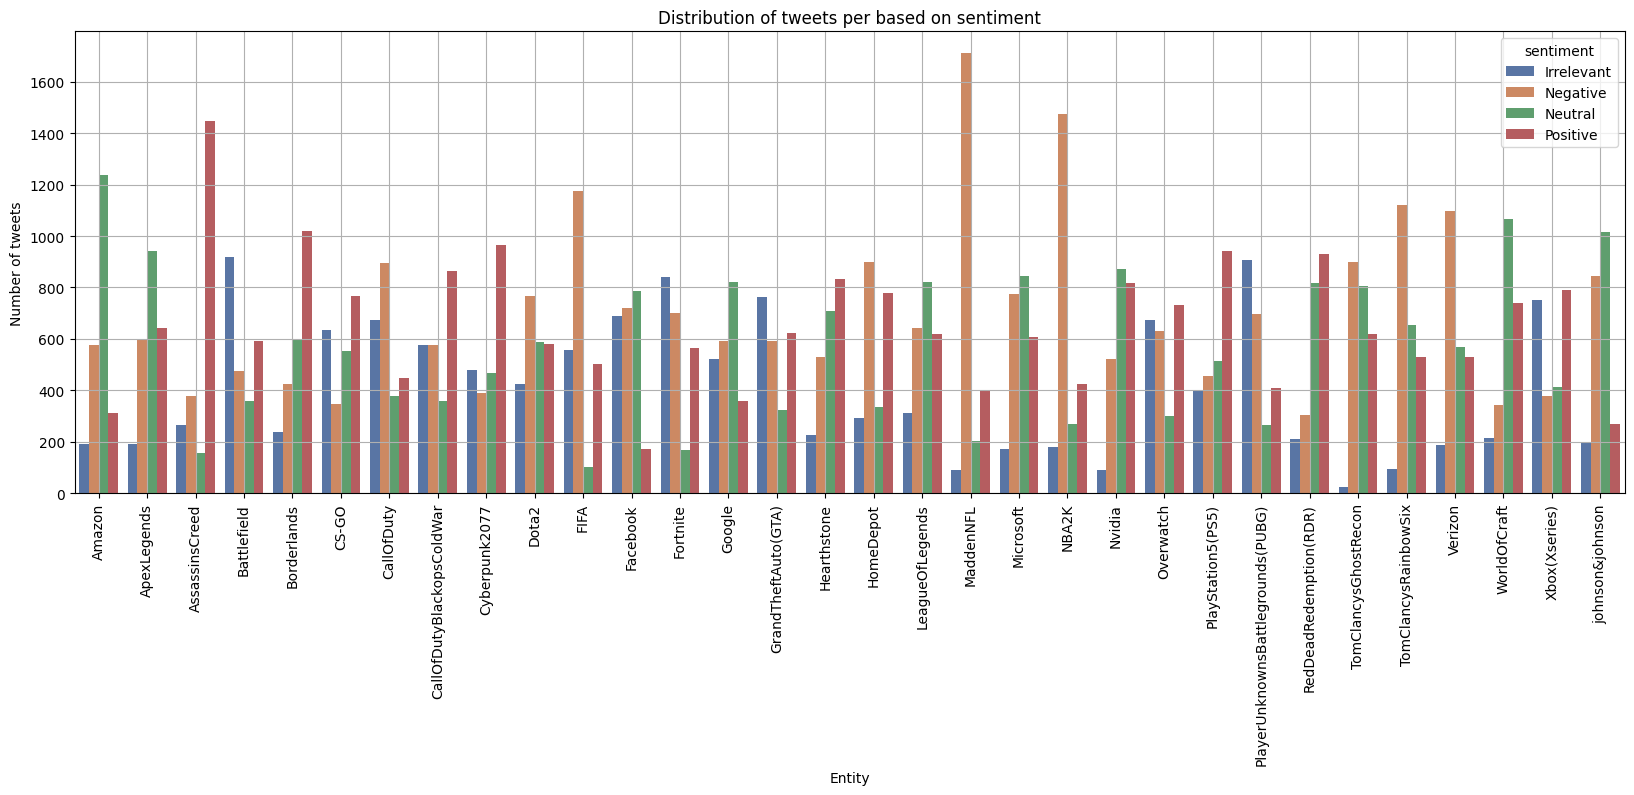

In [ ]:
data1 = df_training.groupby(by=["entity", "sentiment"]).count().reset_index()
plt.figure(figsize=(20, 6))
sns.barplot(data=data1,x="entity", y="Tweet_ID", hue='sentiment', palette="deep")
plt.xticks(rotation=90)
plt.xlabel("Entity")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per based on sentiment")
plt.show()

**WordCloud**

In [ ]:
# positive_words = df_training[df_training["sentiment"]=="Positive"]['content']
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
# word_cloud_text = ''.join(positive_words)
# wordcloud = WordCloud(max_font_size=100,max_words=1000,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
# ax1.imshow(wordcloud, interpolation="bilinear")
# ax1.set_title('Positive', fontsize=18)

# Perform data preprocessing




In [ ]:
df_training.isna().sum()

Tweet_ID       0
entity         0
sentiment      0
content      686
dtype: int64

In [ ]:
# Remove null content
df_training.dropna(inplace=True)
df_training.shape

(73996, 4)

***Remove duplicate***

In [ ]:
df_training.duplicated().sum()

2340

In [ ]:
df_training.drop_duplicates(inplace=True)
df_training.duplicated().sum()

0

In [ ]:
df_training.shape

(71656, 4)

In [ ]:
df_training.reset_index(inplace=True)

In [ ]:
df_training.columns

Index(['index', 'Tweet_ID', 'entity', 'sentiment', 'content'], dtype='object')

**Pie chart of Sentiment Categories**

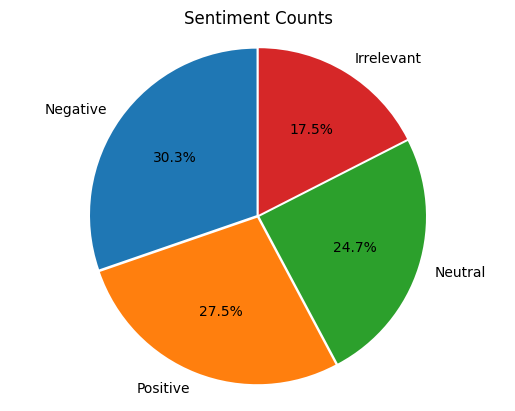

In [ ]:
sentiment_counts = df_training.sentiment.value_counts()
explode = (0.01, 0.01, 0.01, 0.01)
labels = ['Negative','Positive','Neutral','Irrelevant']
plt.pie(sentiment_counts, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'color': "black"})
plt.title('Sentiment Counts')
plt.axis('equal')
plt.show()

**Words Per Message**

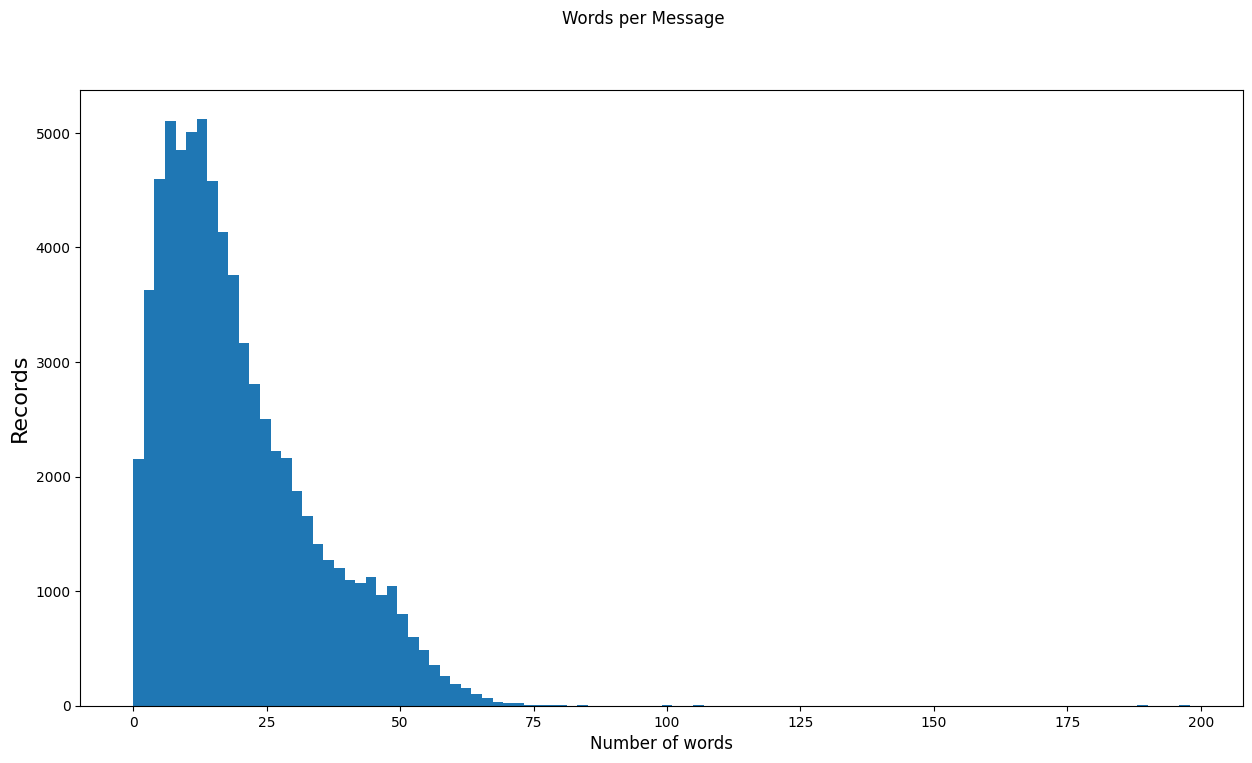

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle('Words per Message')
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Records", fontsize=16)
counts, bins = np.histogram(df_training['content'].str.split().map(lambda x: len(x)),bins=100)
plt.stairs(counts,bins,fill=True)
plt.show()

**Remove irrelevant tweets**

In [ ]:
df_training_2 = df_training[df_training['sentiment']!='Irrelevant']
df_training_2.shape

(59119, 4)

**Get dummy data**

In [ ]:
df_training_with_dummy = pd.get_dummies(data=df_training, columns=['sentiment'])
df_training_with_dummy.head()

,index,Tweet_ID,entity,content,sentiment_Irrelevant,sentiment_Negative,sentiment_Neutral,sentiment_Positive
0,0,2401,Borderlands,im getting on borderlands and i will murder yo...,0,0,0,1
1,1,2401,Borderlands,I am coming to the borders and I will kill you...,0,0,0,1
2,2,2401,Borderlands,im getting on borderlands and i will kill you ...,0,0,0,1
3,3,2401,Borderlands,im coming on borderlands and i will murder you...,0,0,0,1
4,4,2401,Borderlands,im getting on borderlands 2 and i will murder ...,0,0,0,1


In [ ]:
df_training_with_dummy.drop(columns=['Tweet_ID', 'entity'],inplace=True)

In [ ]:
# libraries for data cleaning

import re
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from wordcloud import STOPWORDS
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import string

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
stopwords = set(STOPWORDS)
# initializing method for lemmatizing words
ps = PorterStemmer()
def clean_text(text):
  text = re.sub(r'http\S+', '', text)
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emojilar
    u"\U0001F300-\U0001F5FF"  # simvollar va diagrammalar
    u"\U0001F680-\U0001F6FF"  # transport va turli joylar
    u"\U0001F1E0-\U0001F1FF"  # davlat bayroqlari
    u"\U00002702-\U000027B0"  # dingbats
    u"\U000024C2-\U0001F251"  # alamatchilik belgilari
    "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  # Remove hashtags
  text = re.sub(r'#\w+', '', text)

  # Remove mentions
  text = re.sub(r'@\w+', '', text)

  # Convert to lower case
  text = text.lower()

  # Remove unwanted spaces and symbols
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Splitting the string for lemmatization
  text = text.split()

  # Using stopwords to remove irrelavent words and lemmatizing the final output
  final_words = [ps.stem(word) for word in text if not word in stopwords]

  # Return the final result
  return (" ".join(final_words))

In [ ]:
df_training_with_dummy['content'].head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: content, dtype: object

In [ ]:
df_training_with_dummy['content'] = df_training_with_dummy['content'].apply(lambda x: clean_text(x))

**Prepare the data for LSTM (Tokenise words)**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
top_words = 10000
max_len = 40
tokenizer = Tokenizer(num_words=top_words, split=' ')
tokenizer.fit_on_texts(df_training_with_dummy['content'].values)
sequences = tokenizer.texts_to_sequences(df_training_with_dummy['content'].values)
word_index = tokenizer.word_index
max_seq_length = max(len(seq) for seq in sequences) + 1

print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_seq_length, padding='pre')

Found 32431 unique tokens.


**One hot encoding**

In [ ]:
## vocabulary size
vocab_size = 5000
onehot_repr = [one_hot(words, vocab_size) for words in df_training_with_dummy['content']]

**Embedding Representation**

In [ ]:
sent_length = max_seq_length
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  910  920   73]
 [   0    0    0 ... 2413  920 1983]
 [   0    0    0 ...  910  920 1983]
 ...
 [   0    0    0 ... 1389  972 2076]
 [   0    0    0 ... 3713 3640 2076]
 [   0    0    0 ... 1389  972 2076]]


In [ ]:
embedded_docs.shape

(71656, 164)

**Building model**

In [ ]:
embed_dim = 40
model = Sequential()
model.add(Embedding(vocab_size, embed_dim, input_length=max_seq_length))

model.add(LSTM(100,dropout=0.25,recurrent_dropout=0.25))
# model.add(Dense(50,activation='relu'))
# model.add(Dense(25,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

# Step 5: Training and Evaluation
#model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 164, 40)           200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y= df_training_with_dummy[['sentiment_Negative', 'sentiment_Neutral', 'sentiment_Positive']]
y.shape

(71656, 3)

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

print(X_final.shape, y_final.shape)

(71656, 164) (71656, 3)


In [ ]:
parameters_of_Embedding_layer = top_words*embed_dim
parameters_of_Embedding_layer

400000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 14)
X_train.shape, X_test.shape

((57324, 163), (14332, 163))

In [ ]:
batch_size = 32

model.fit(X_train, y_train, epochs = 7, batch_size = batch_size, validation_data = (X_test, y_test), callbacks = EarlyStopping(patience = 3, restore_best_weights = True))

Epoch 1/7


ValueError: ignored

**Introducing the test/validation dataset**

**Build and train the LSTM model**

**Model Evaluation**

**Make predictions**

https://www.kaggle.com/code/yasmeensharaan/twitter-sentiment-using-lstm